In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score
import warnings

sns.set()
sns.set(style="darkgrid")


In [3]:
df=pd.read_csv(r'C:\Users\CV MURALI\Downloads\water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.shape

(3276, 10)

In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
nan=df.isna().sum().loc[lambda x:x>0]
nan

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

In [10]:
lst=['ph','Sulfate','Trihalomethanes']
for i in lst:
  df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
x=df.iloc[:,:-1].values
x

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [12]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
for i in df:
#  if df[i].dtype in ['int64','float']:
    print(i,'|',df[i].unique())

ph | [7.0807945  3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
Hardness | [204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
Solids | [20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
Chloramines | [7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586]
Sulfate | [368.51644135 333.77577661 356.88613564 ... 258.93060041 345.70025734
 359.94857437]
Conductivity | [564.30865417 592.88535913 418.60621306 ... 432.04478305 402.88311312
 327.45976046]
Organic_carbon | [10.37978308 15.18001312 16.86863693 ... 11.03906969 11.16894622
 16.14036763]
Trihalomethanes | [86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633]
Turbidity | [2.96313538 4.50065627 3.05593375 ... 3.2988755  4.70865847 2.30914906]
Potability | [0 1]


In [14]:
cor=df.corr()
print(cor)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

<Figure size 720x720 with 0 Axes>

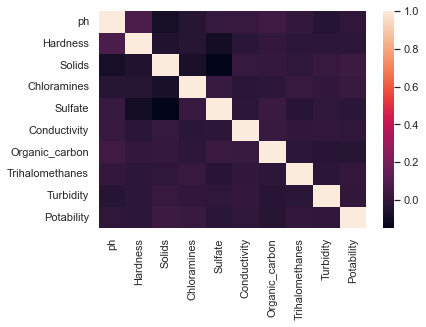

<Figure size 720x720 with 0 Axes>

In [15]:
sns.heatmap(cor)
plt.figure(figsize=(10,10))

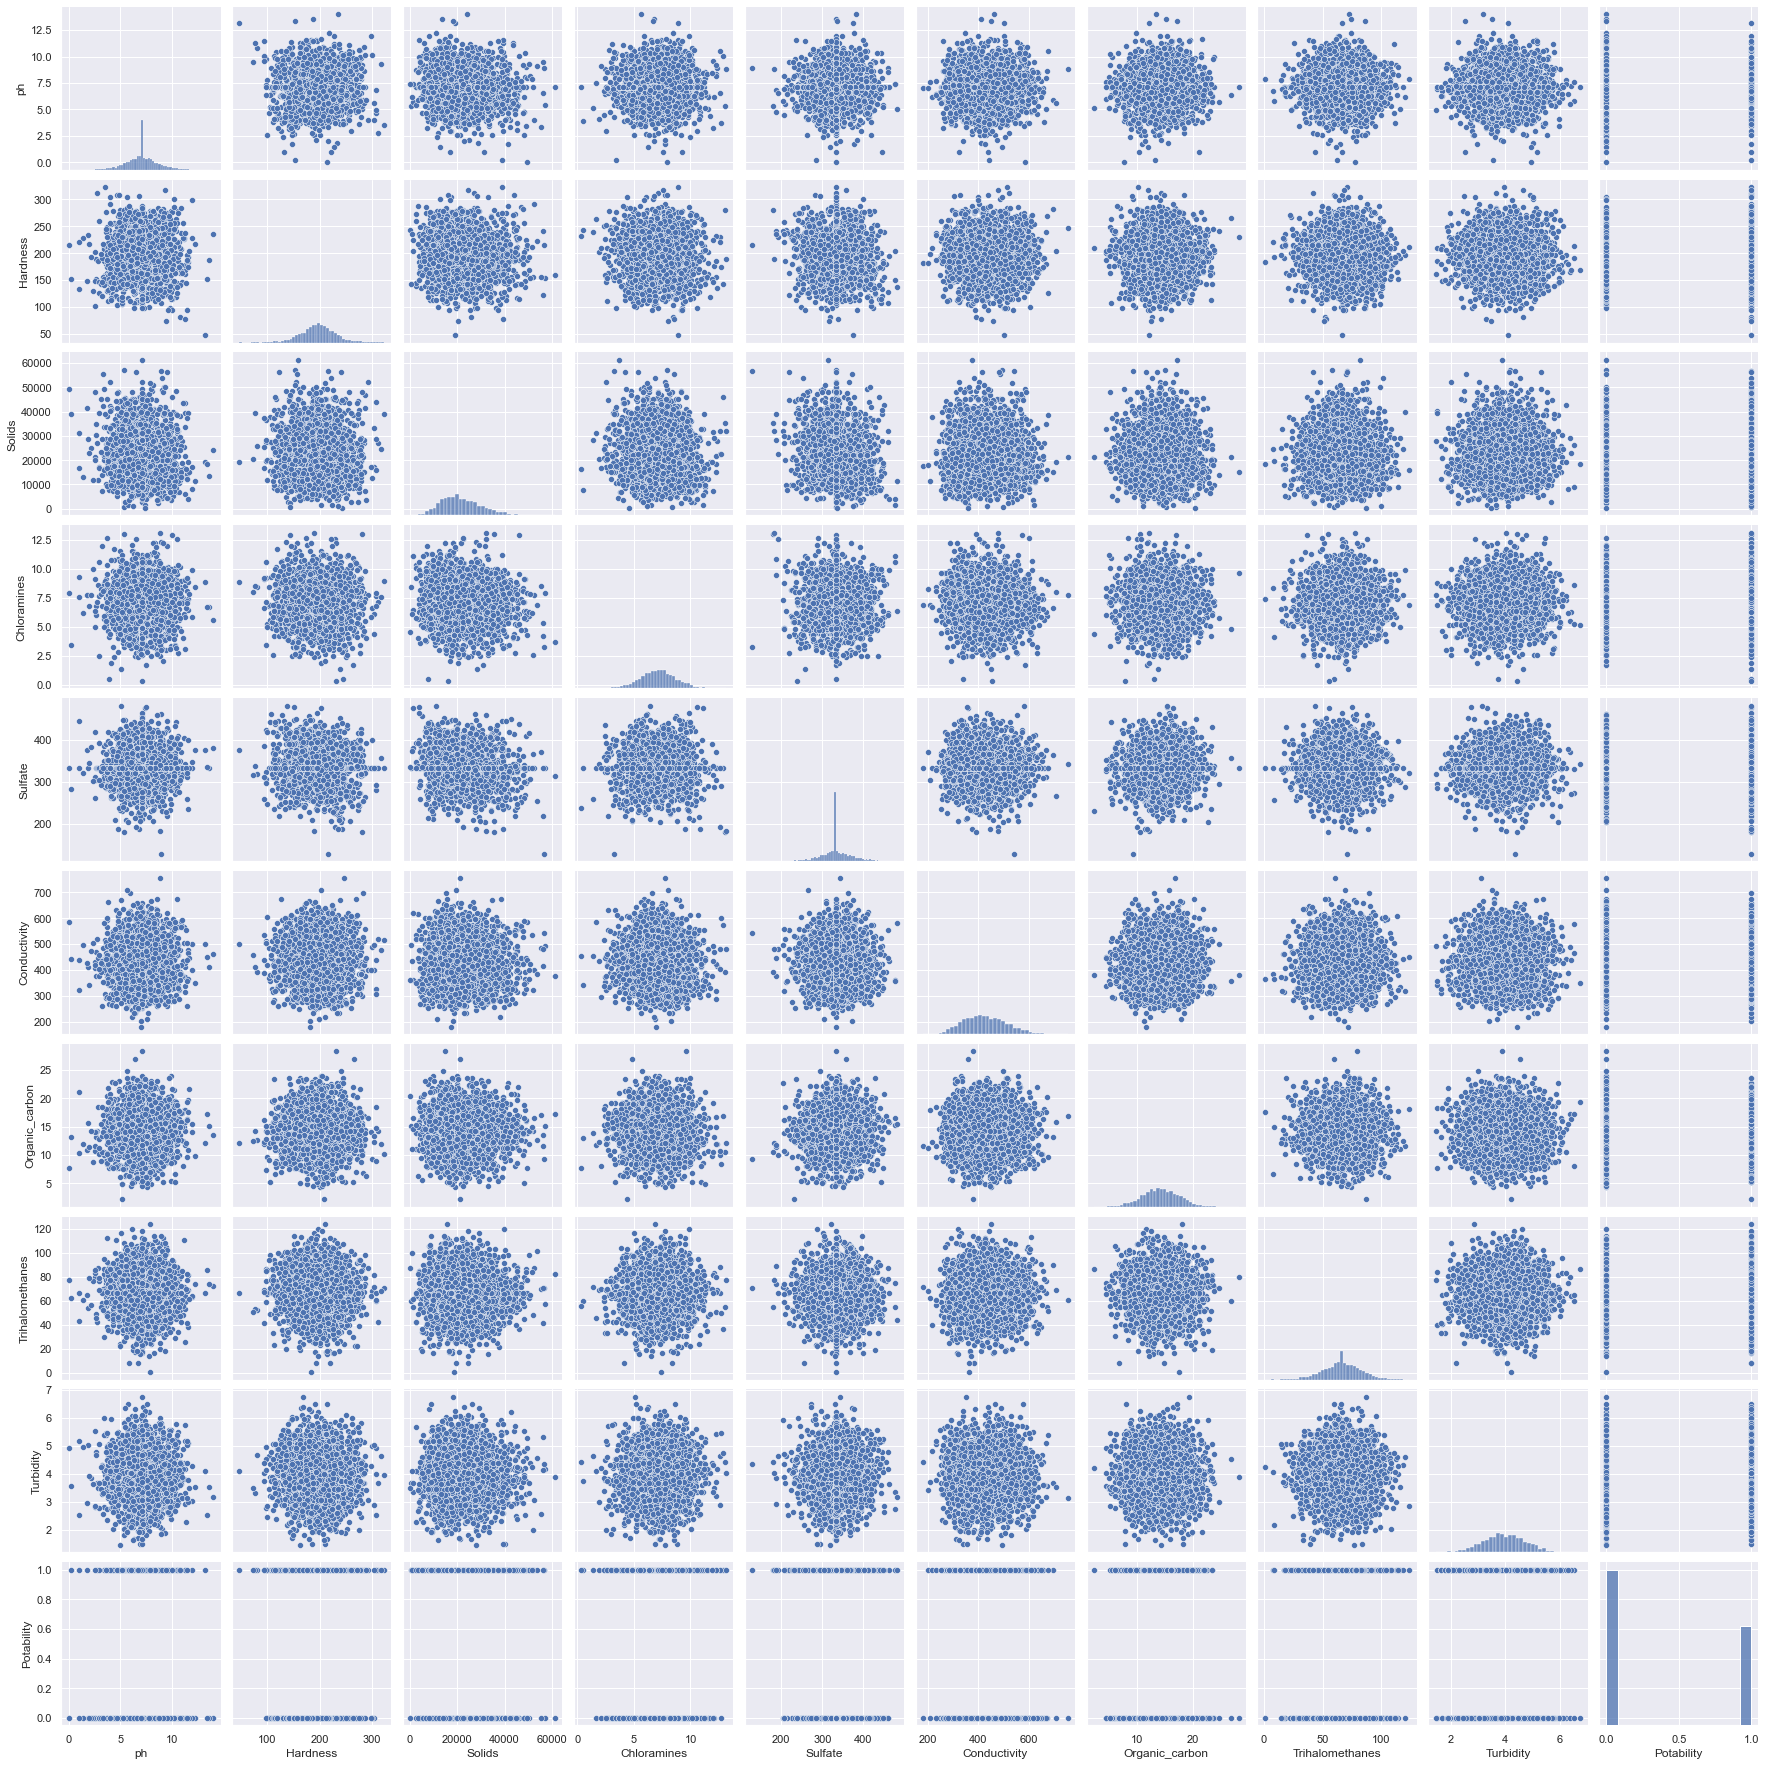

In [16]:
sns.pairplot(df)

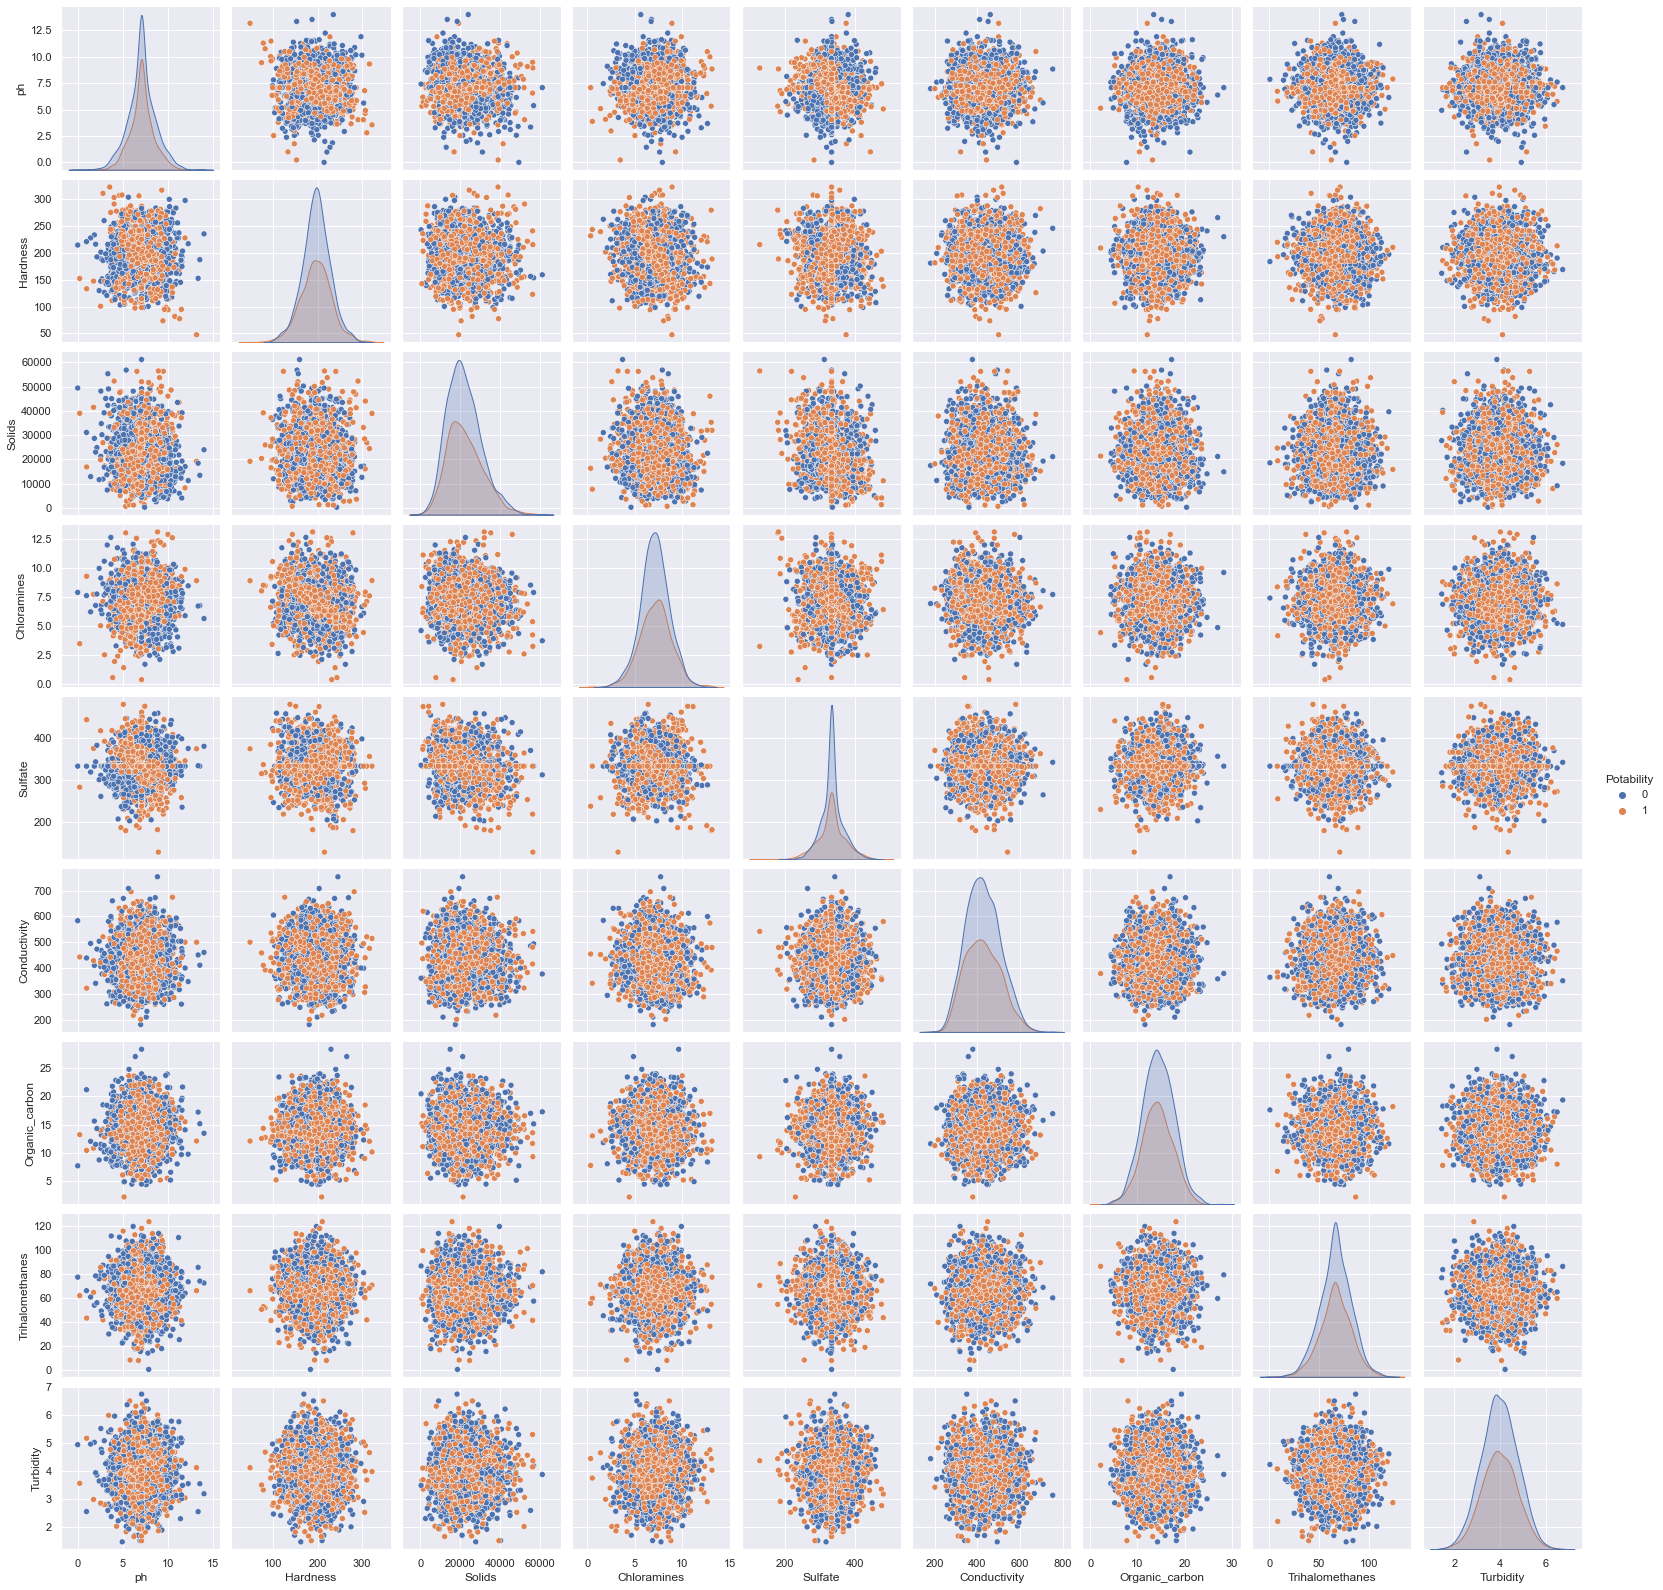

In [17]:
sns.pairplot(df,hue='Potability',kind='scatter')
plt.show()

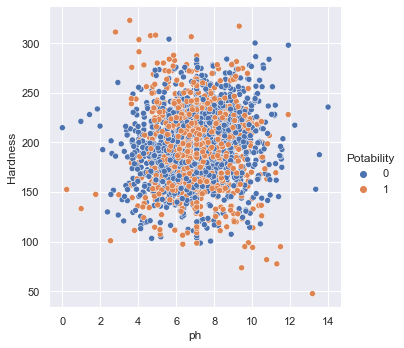

In [18]:
sns.relplot(x="ph", y="Hardness", hue="Potability",data=df)

C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

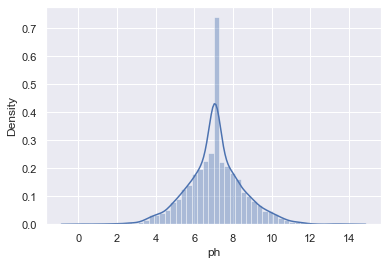

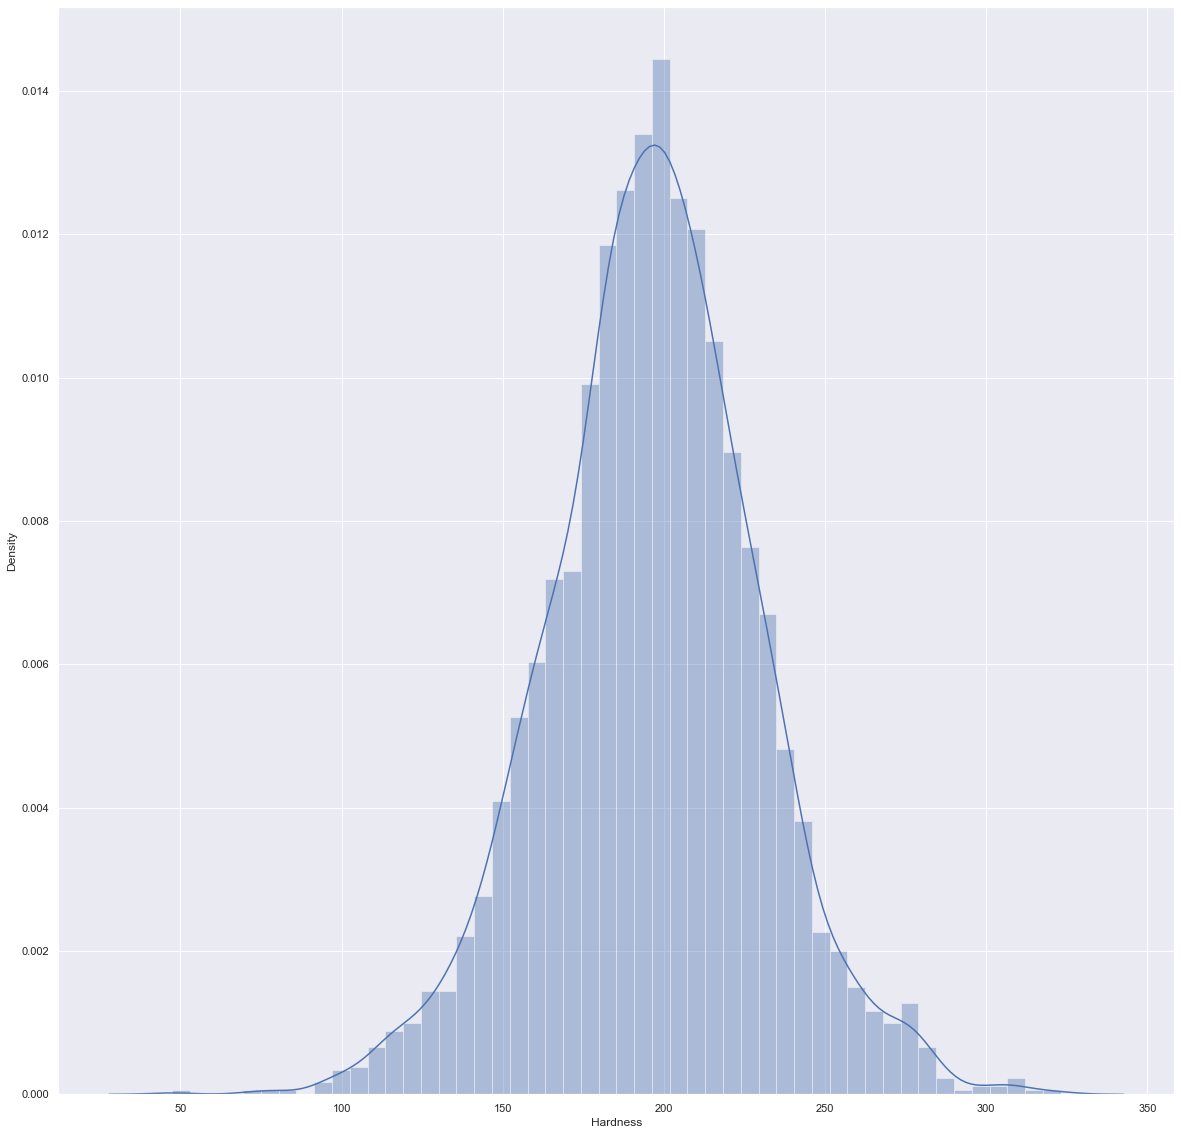

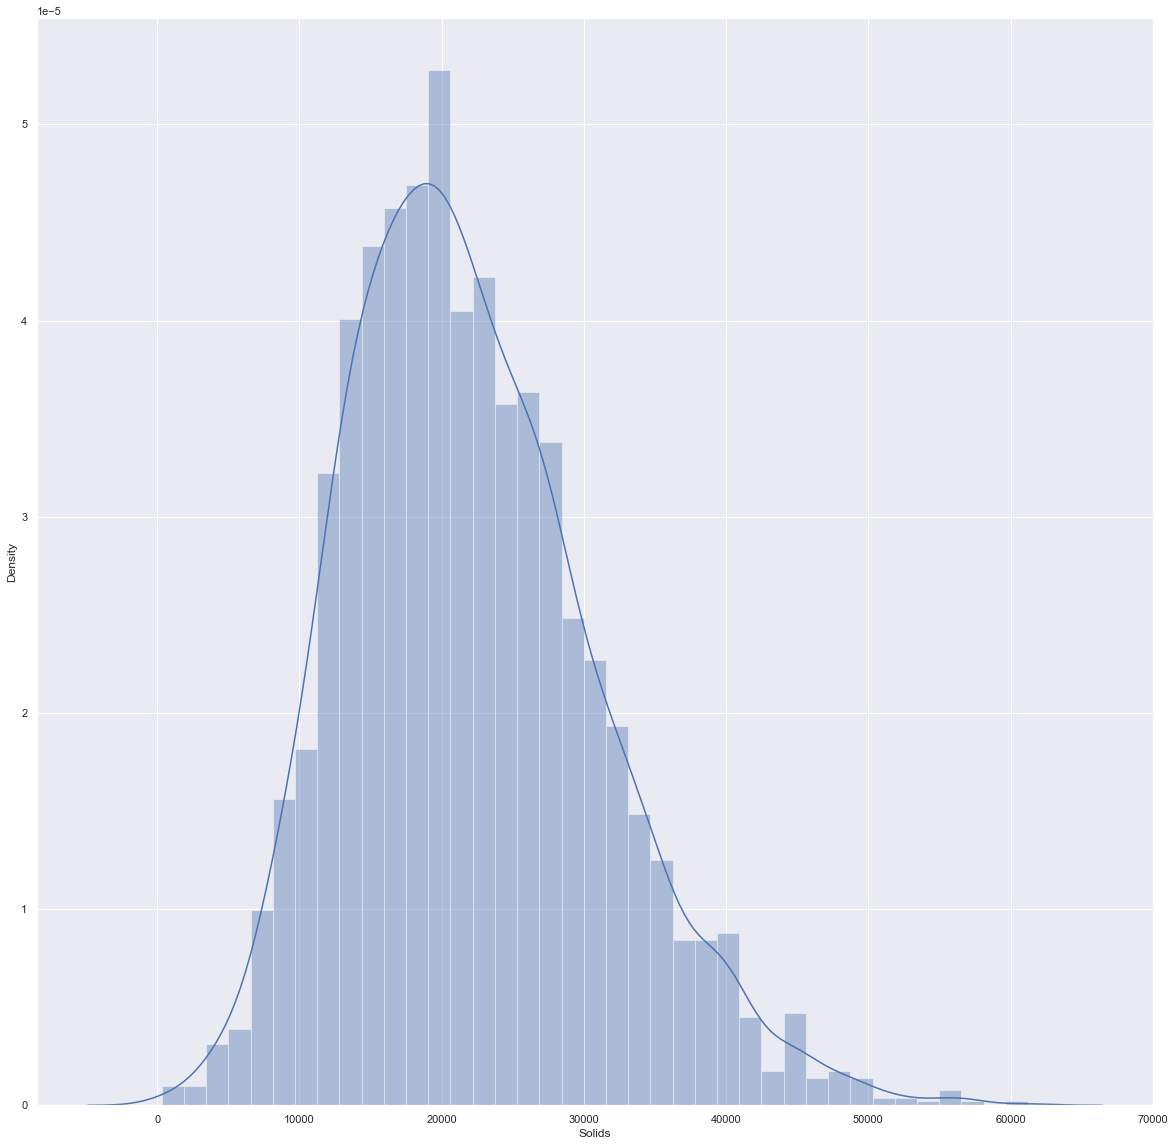

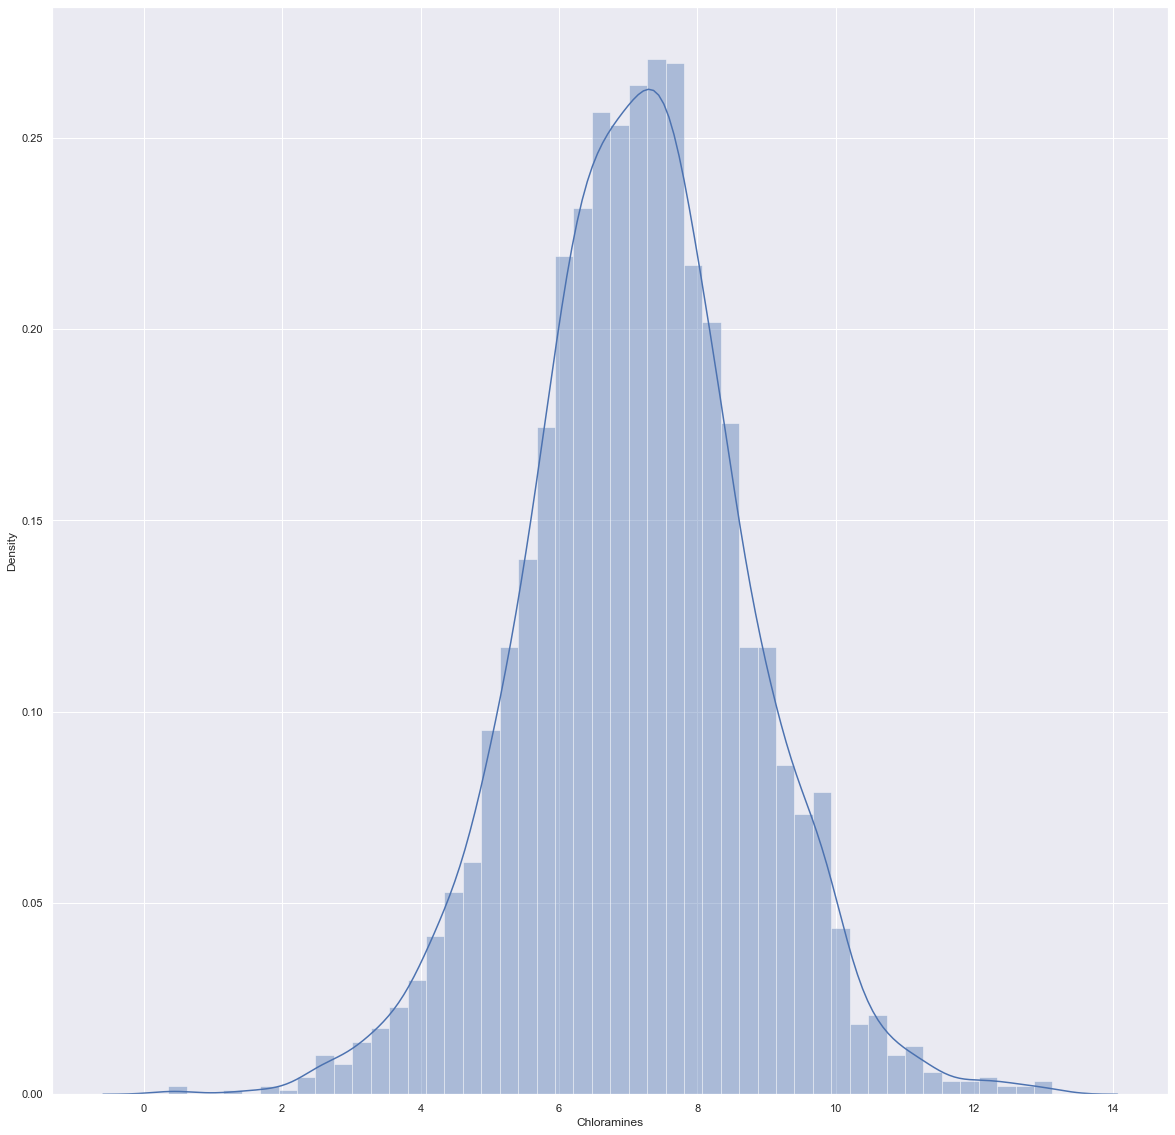

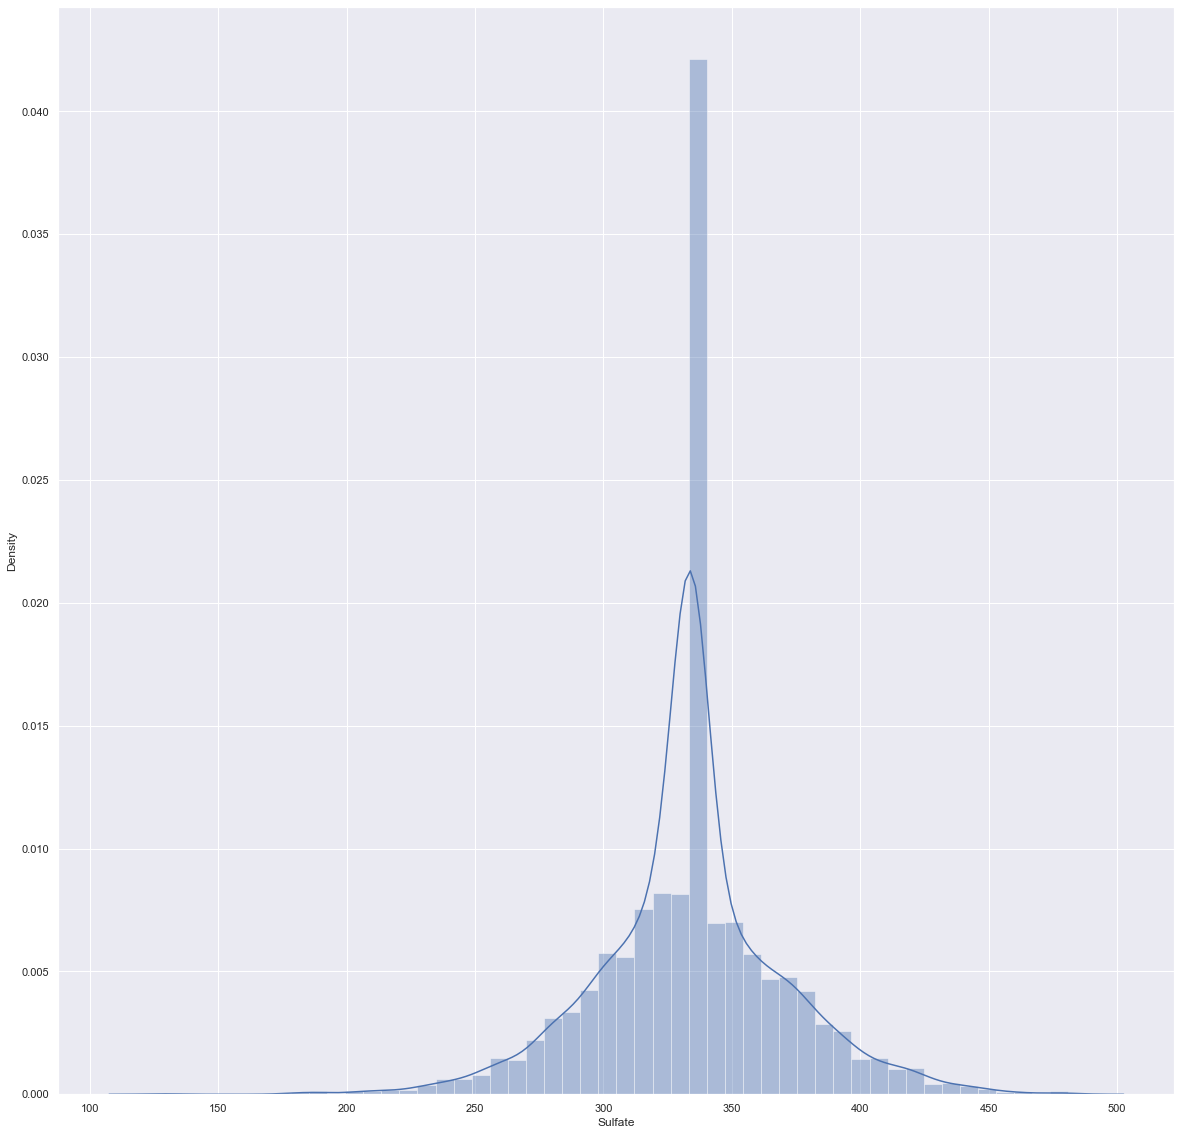

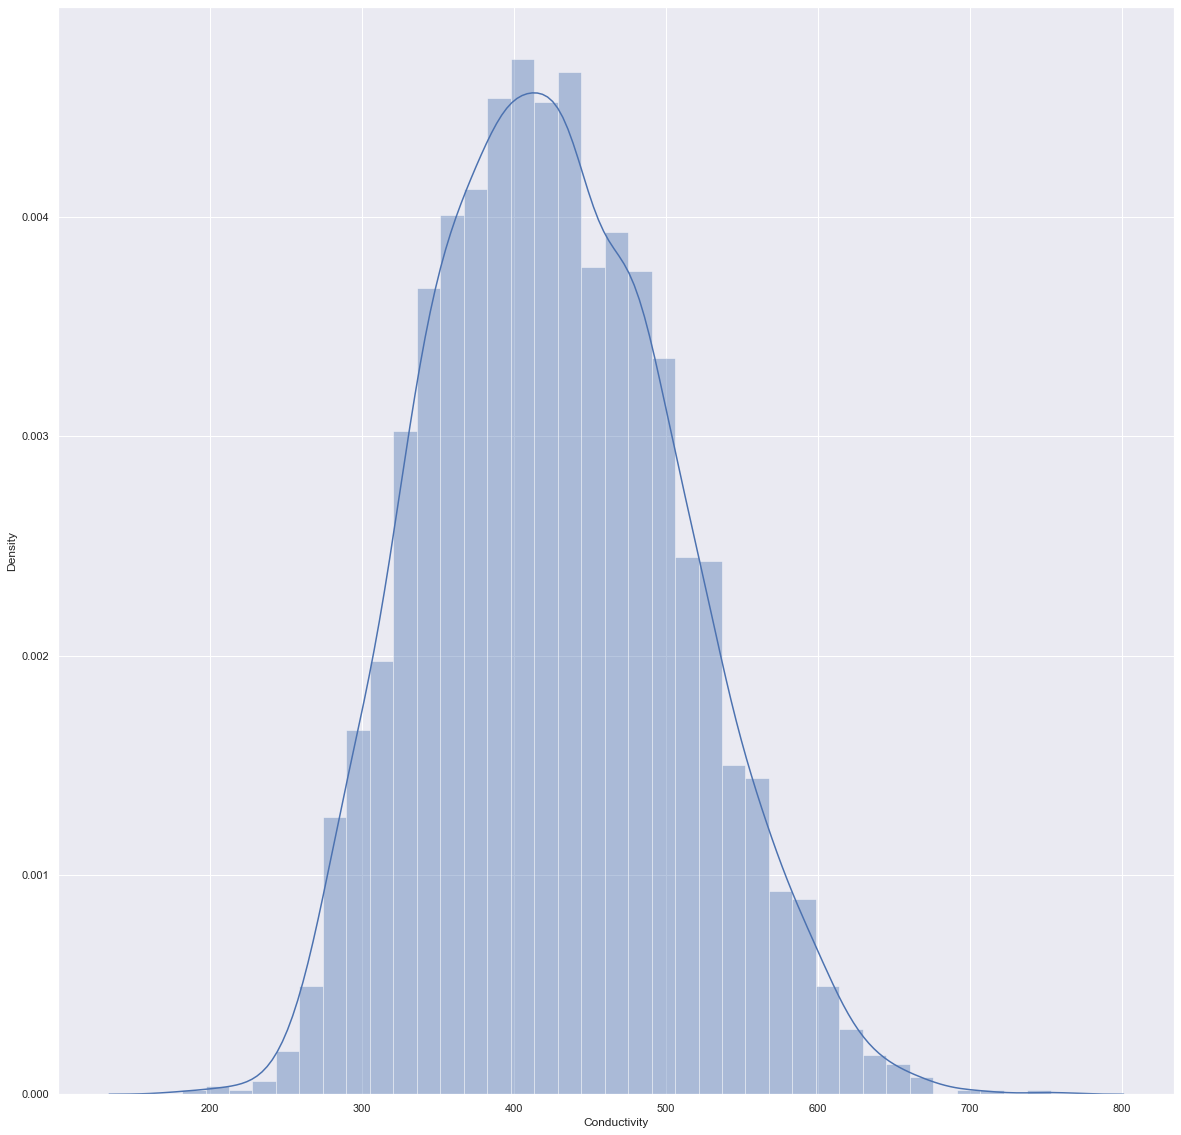

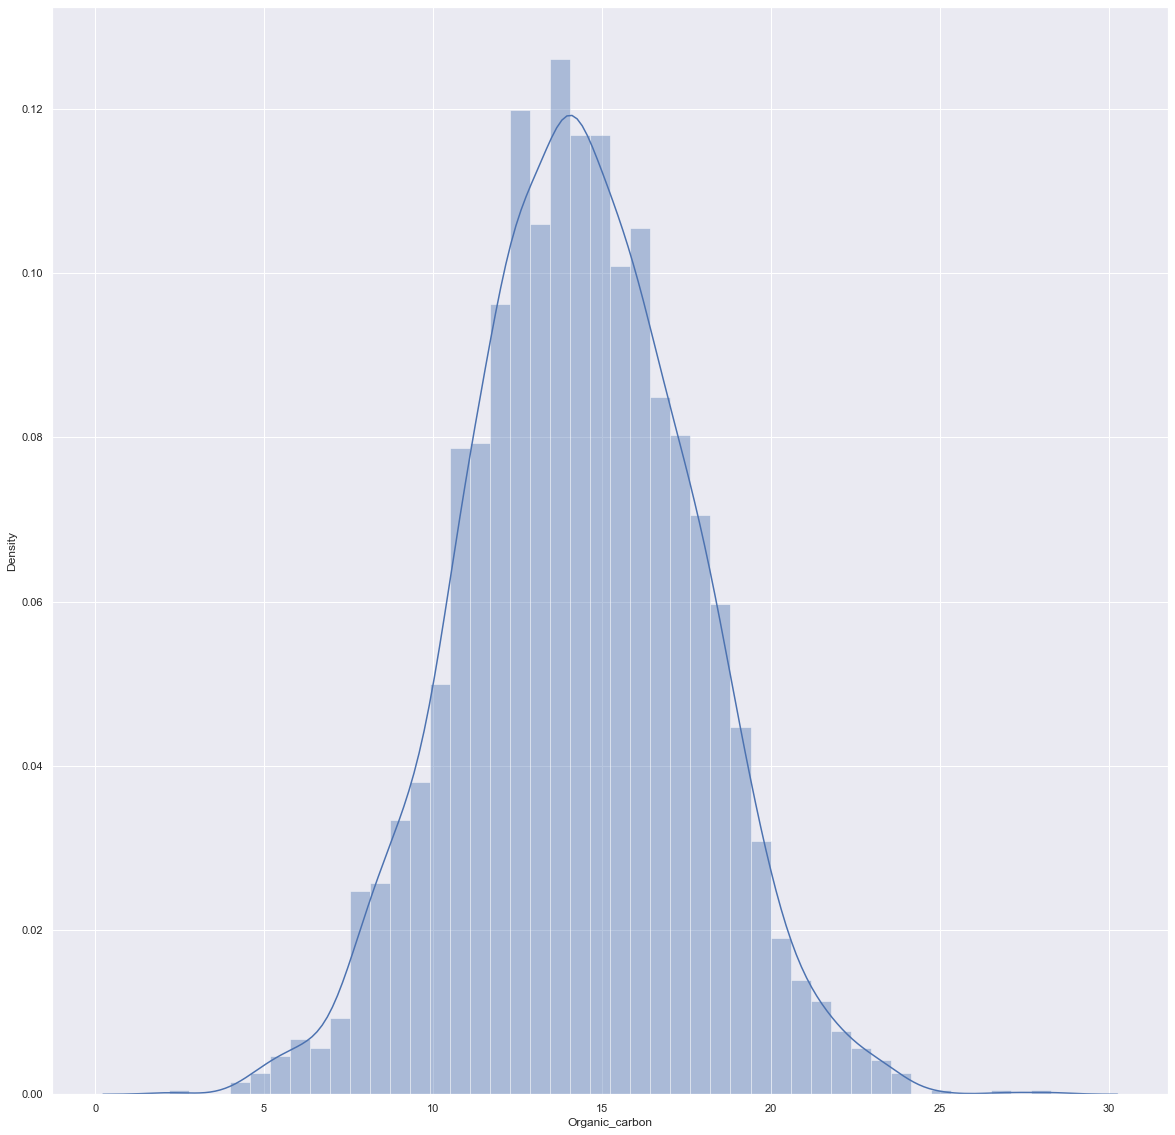

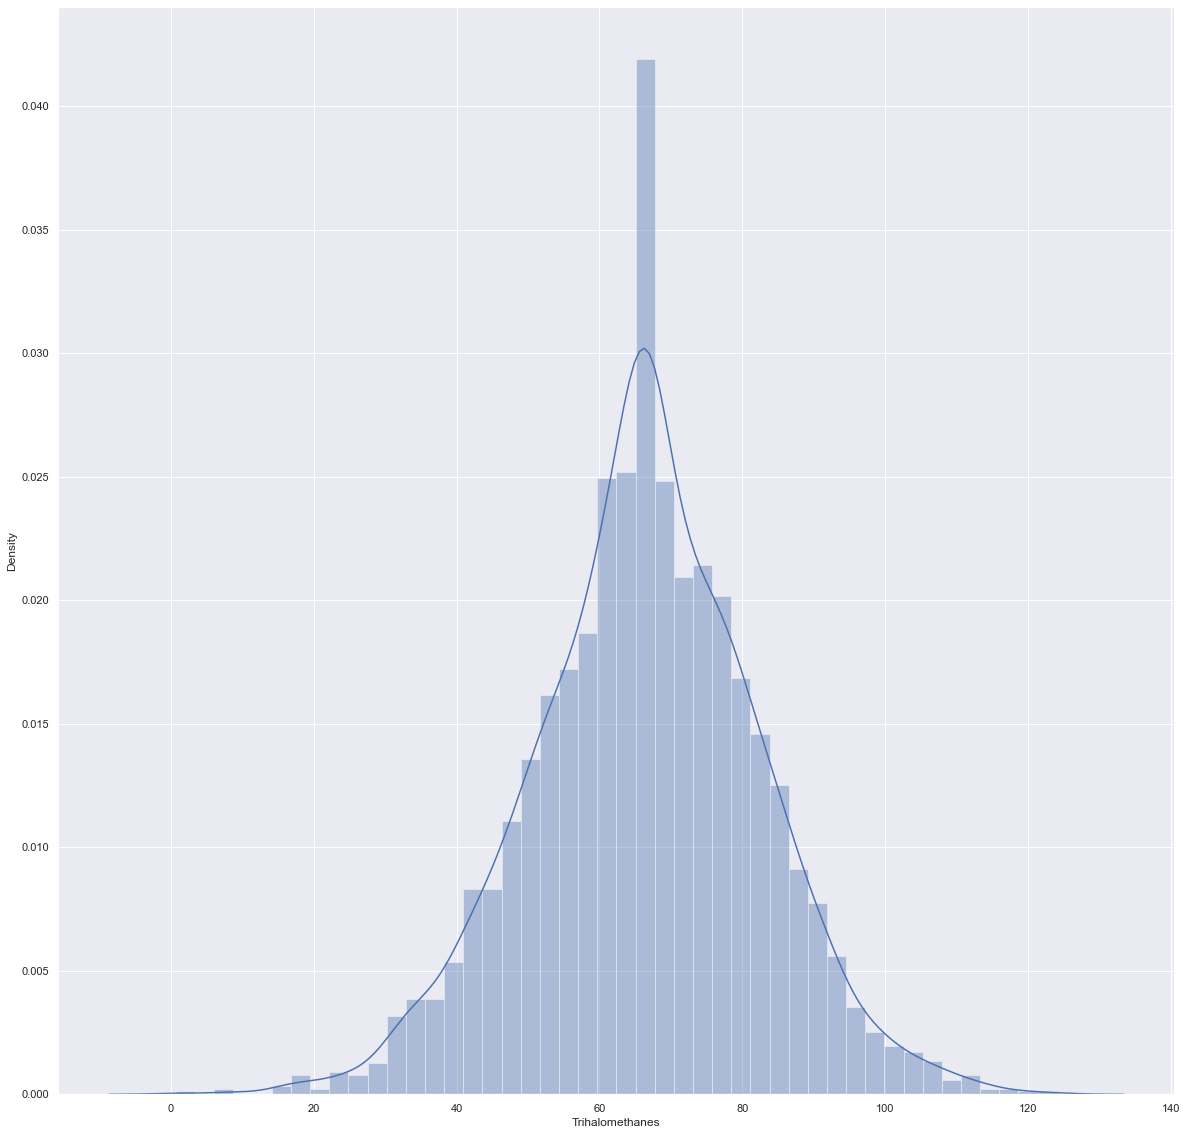

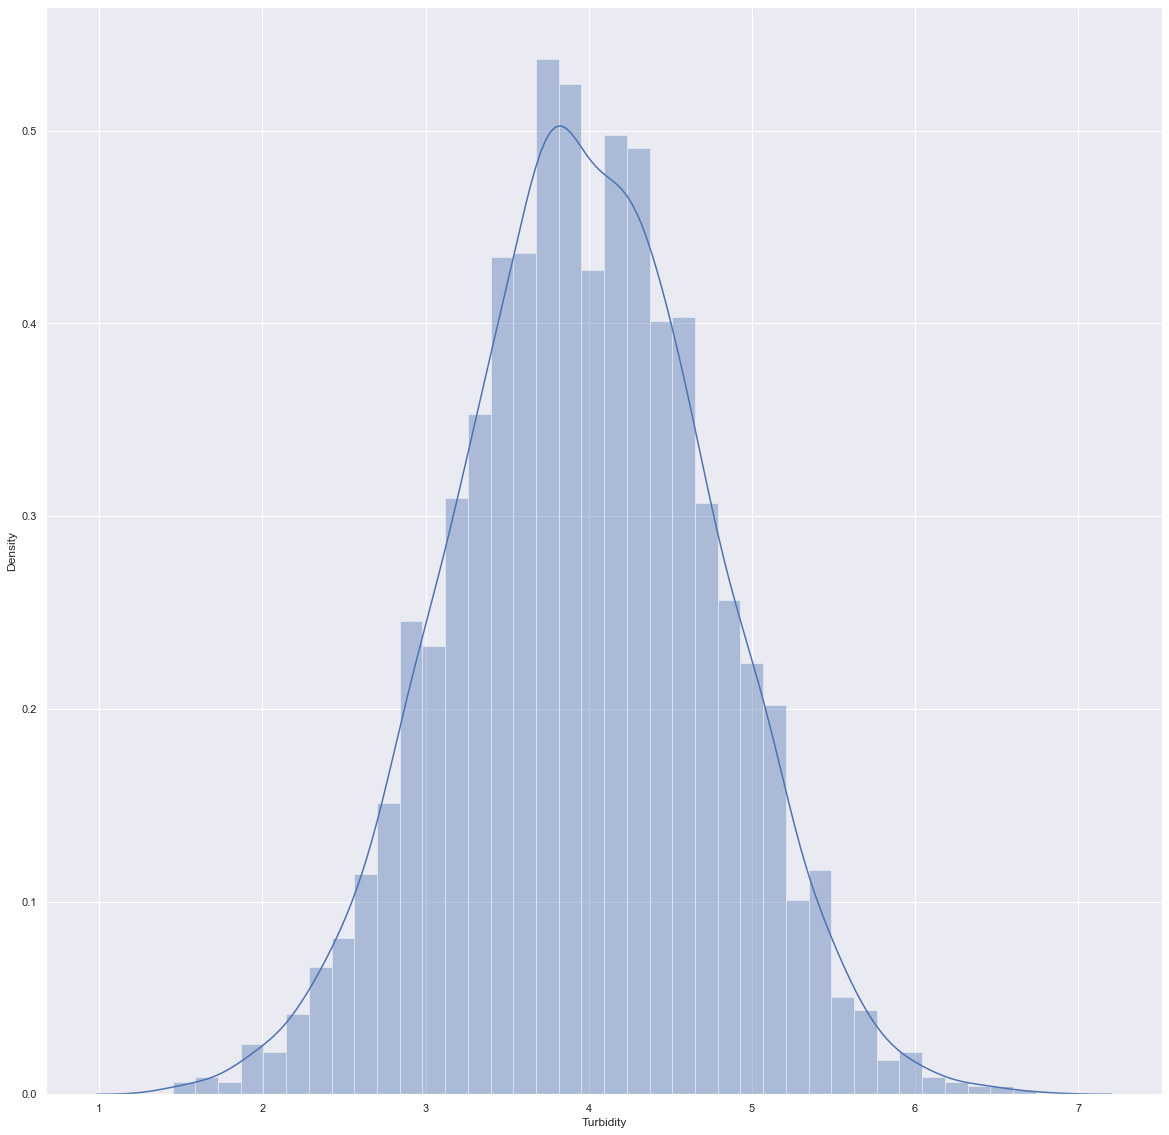

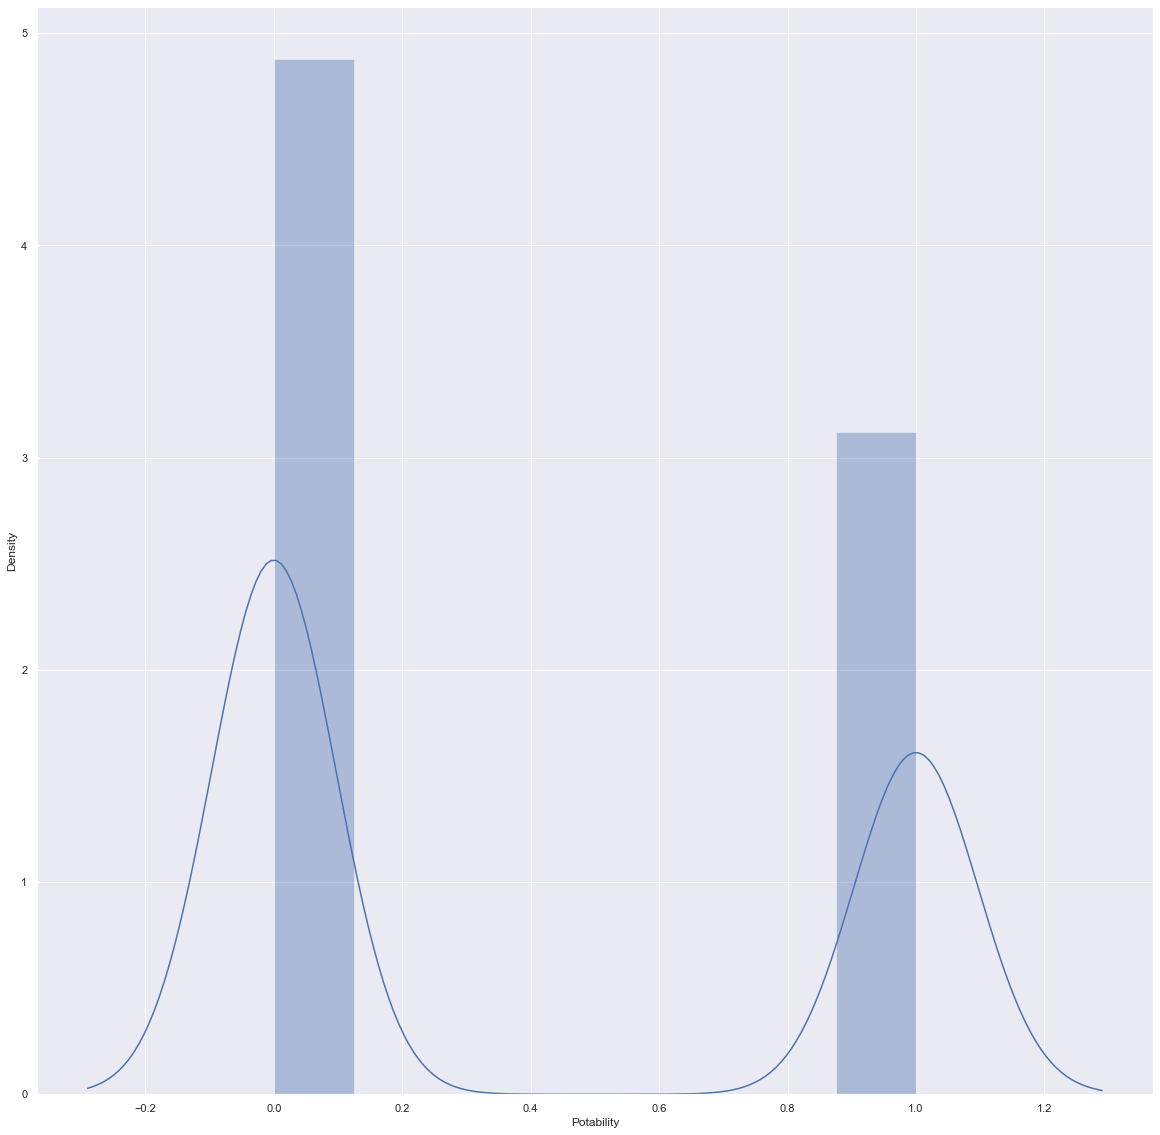

<Figure size 1440x1440 with 0 Axes>

In [19]:
lst=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
for i in lst:
    sns.distplot(df[i])
    plt.figure(figsize=(20,20))

C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CV MURALI\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.w

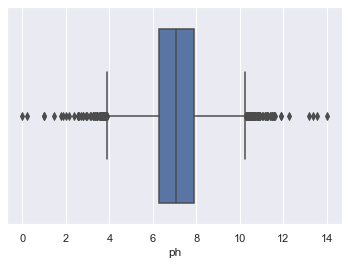

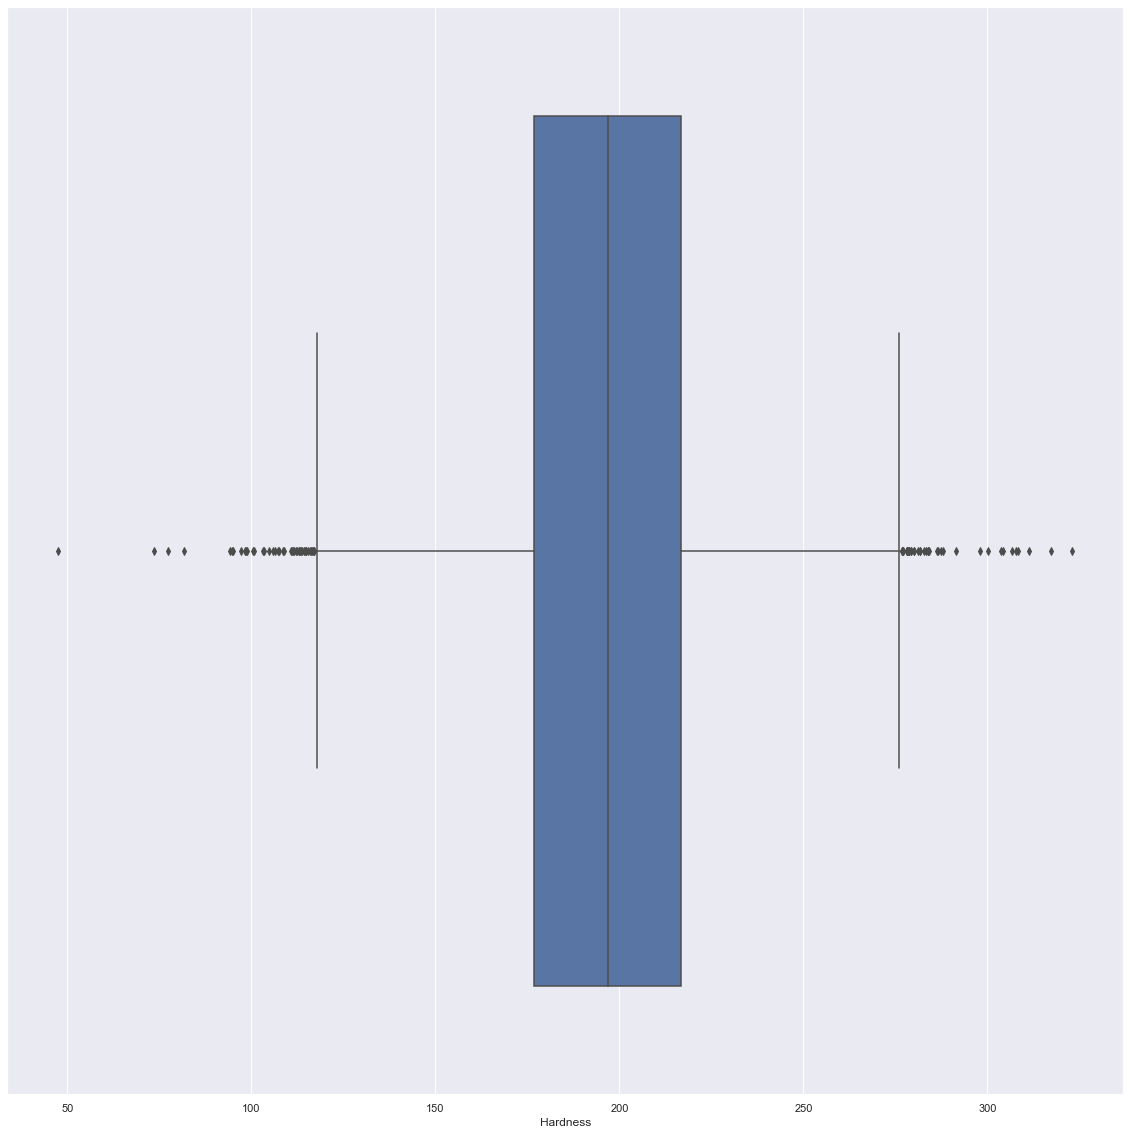

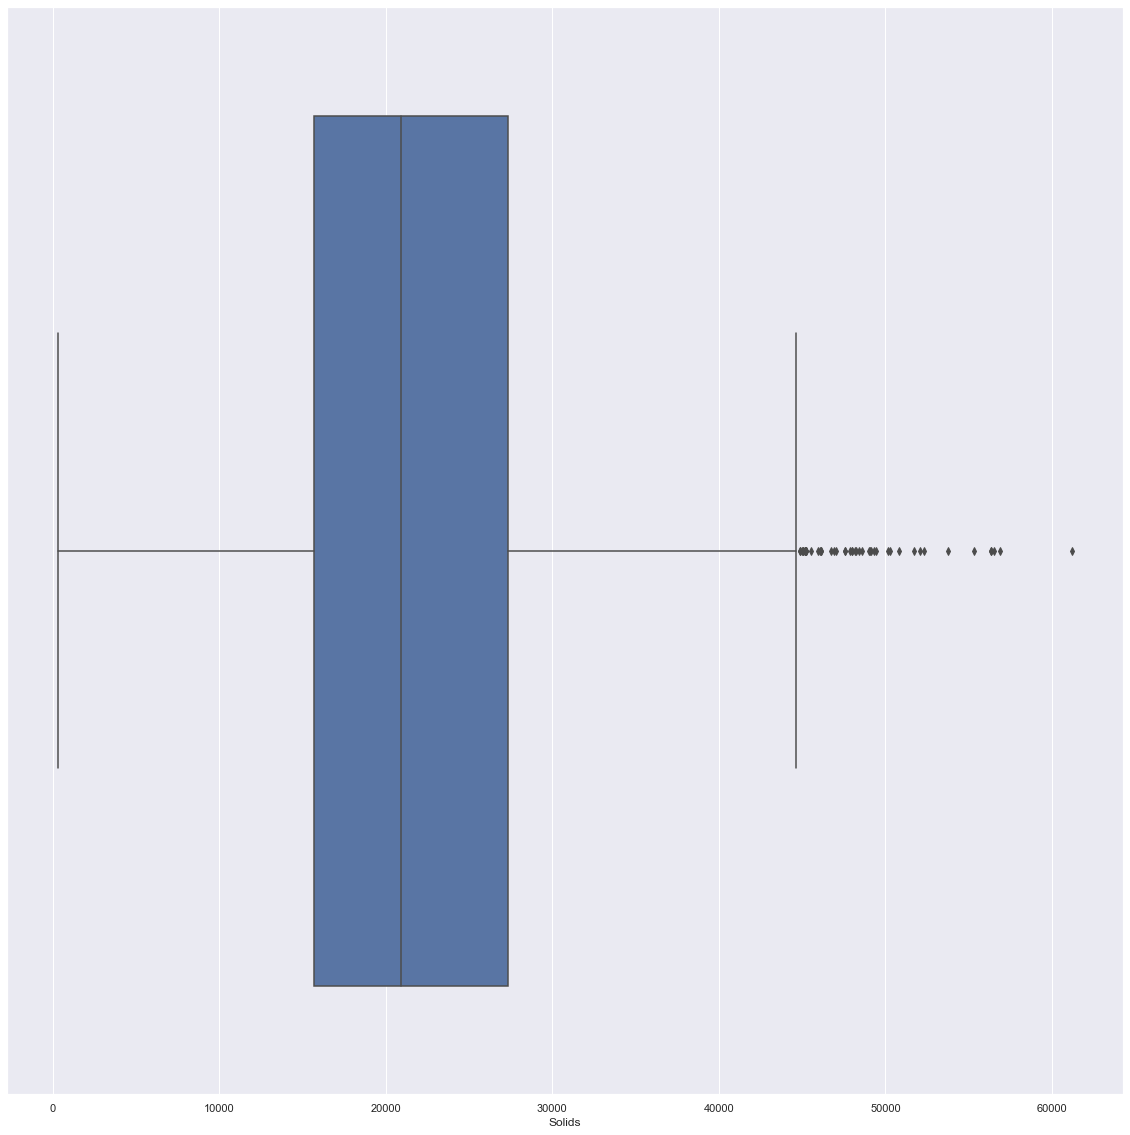

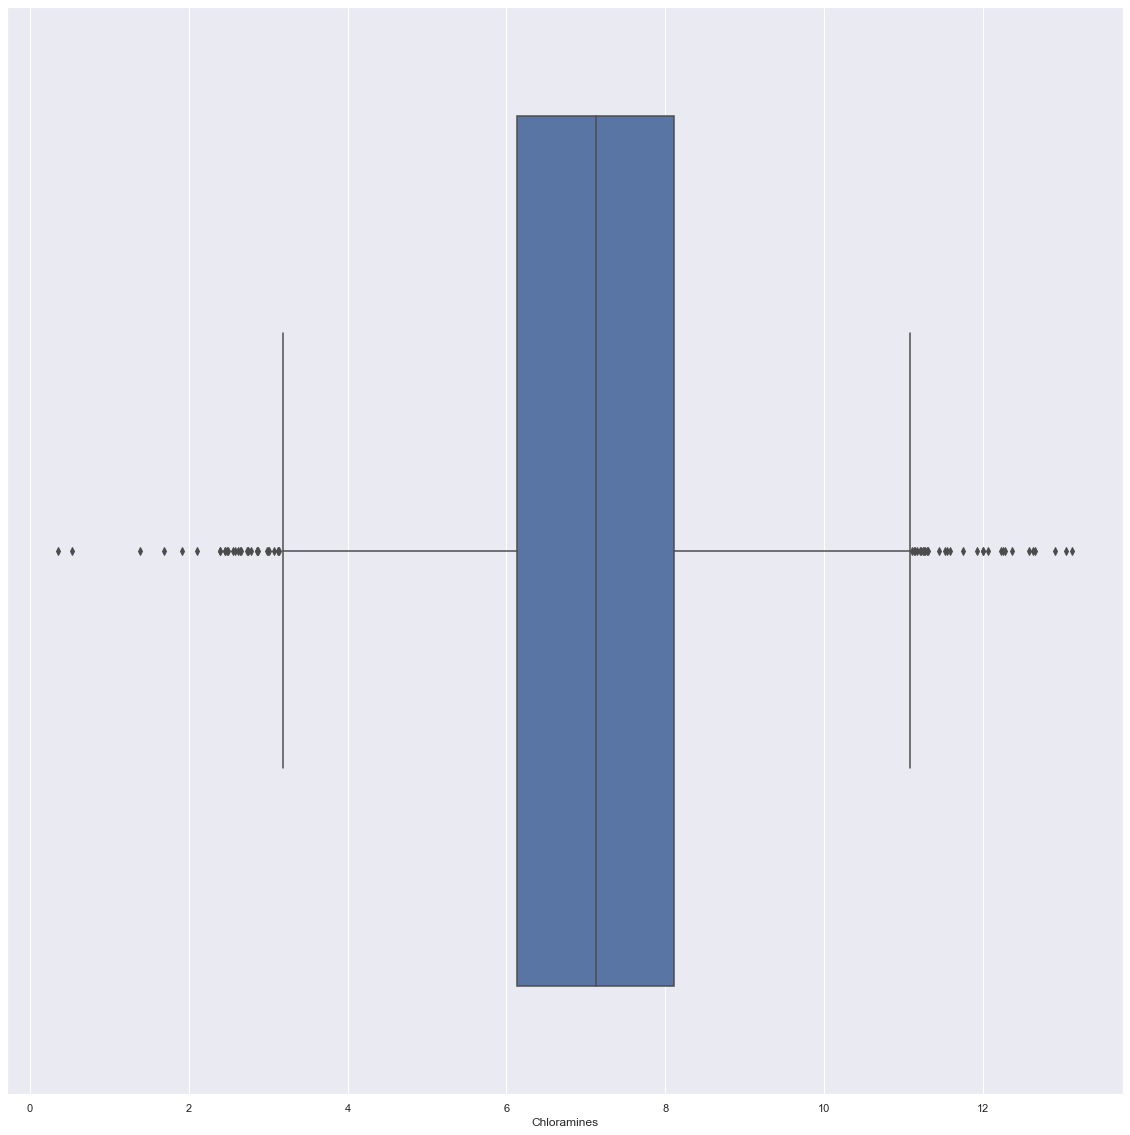

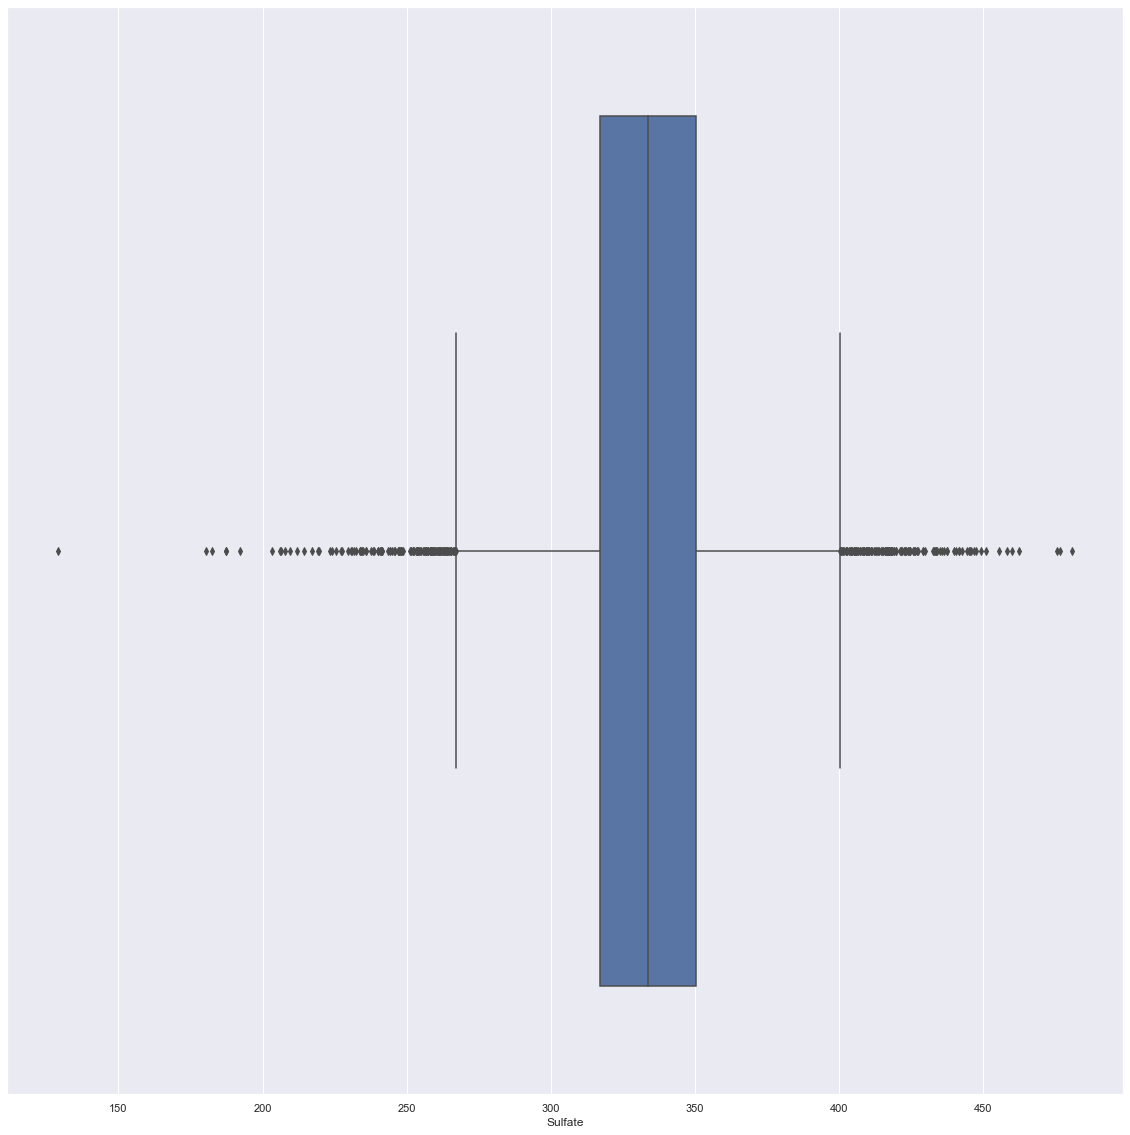

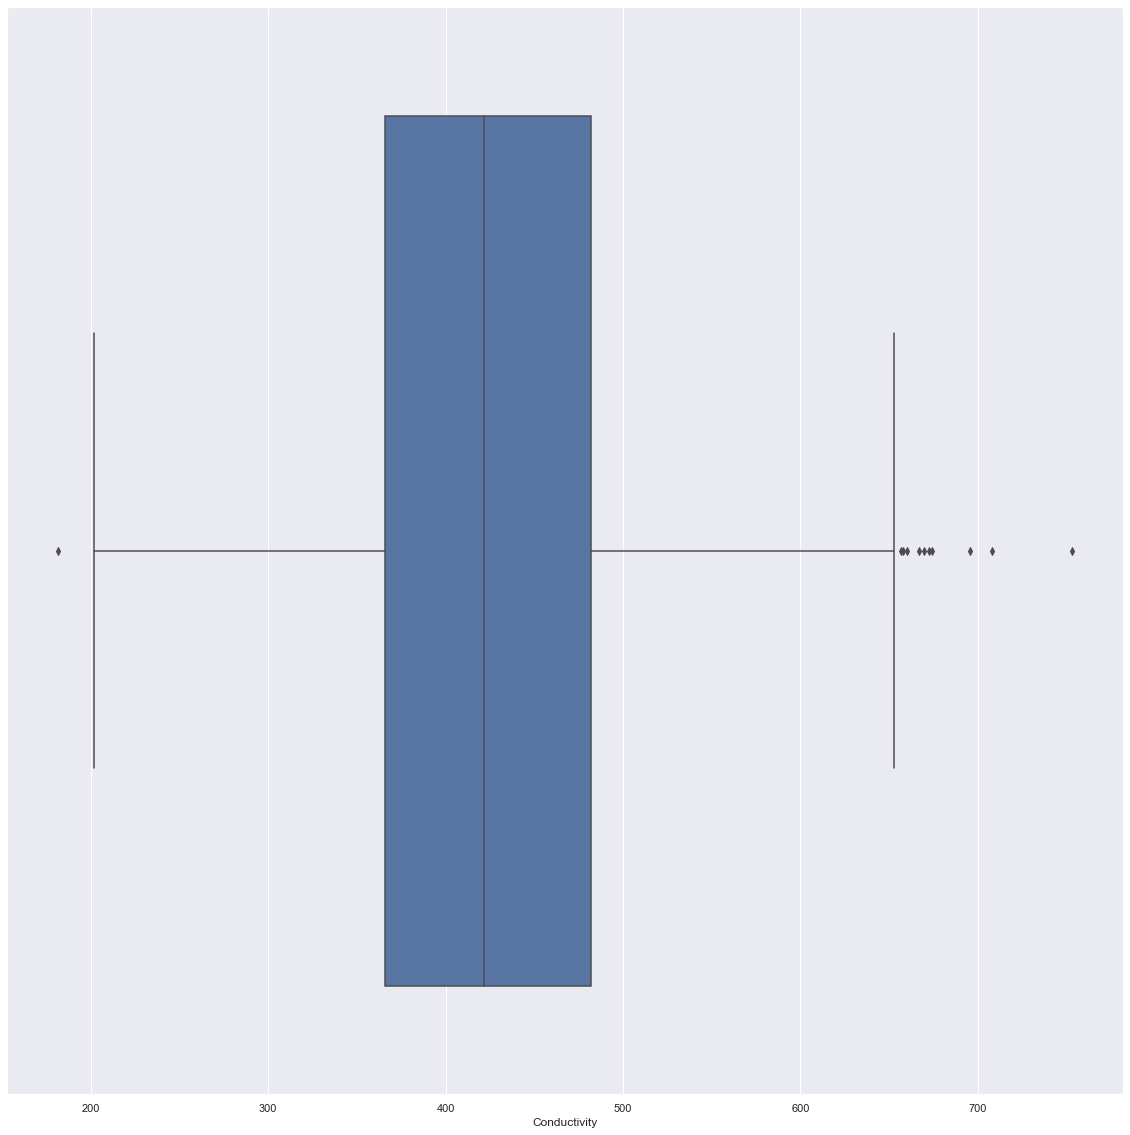

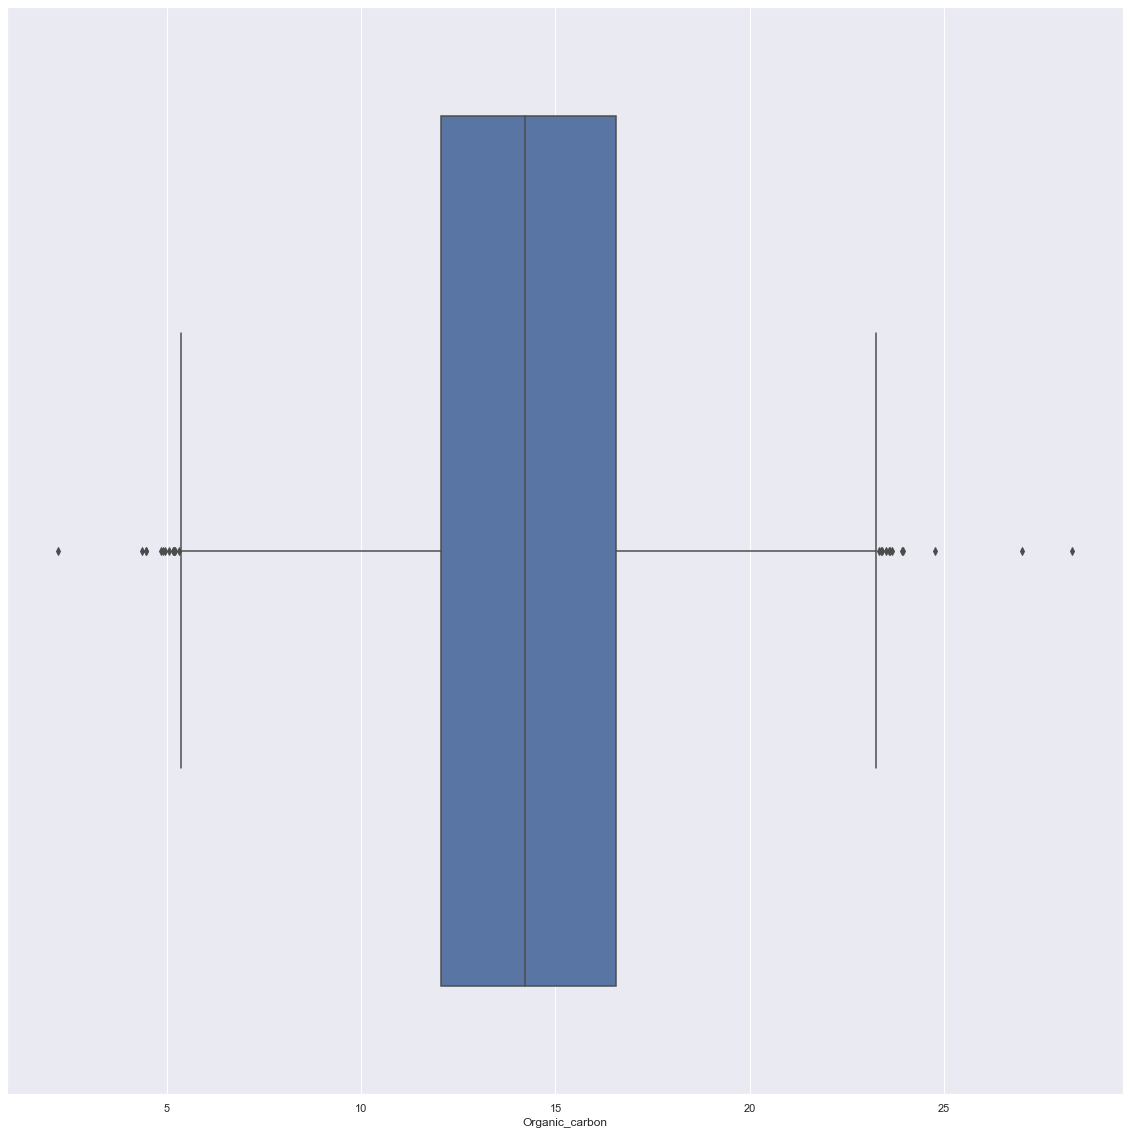

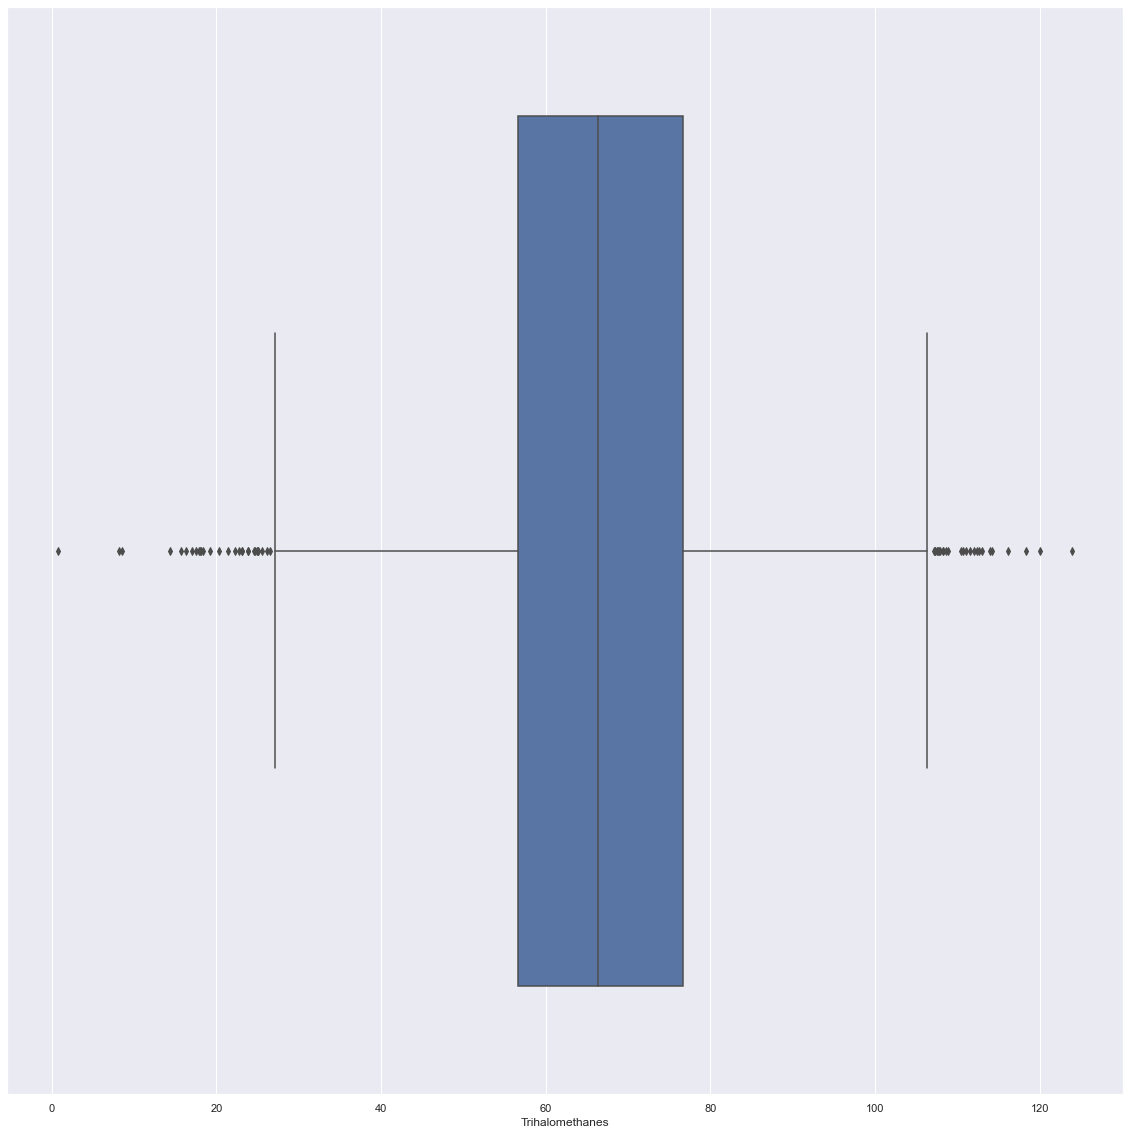

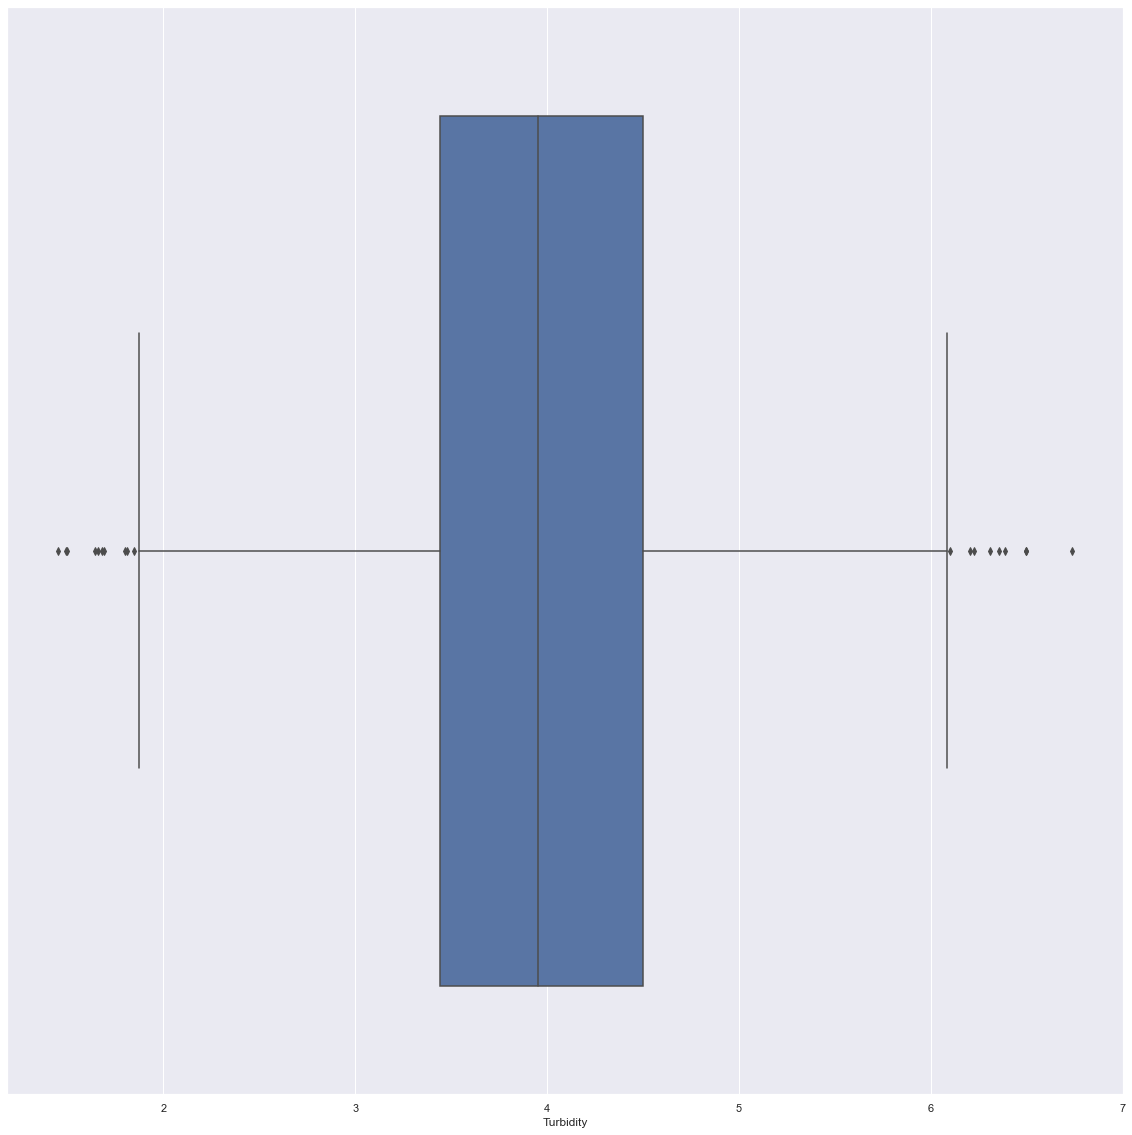

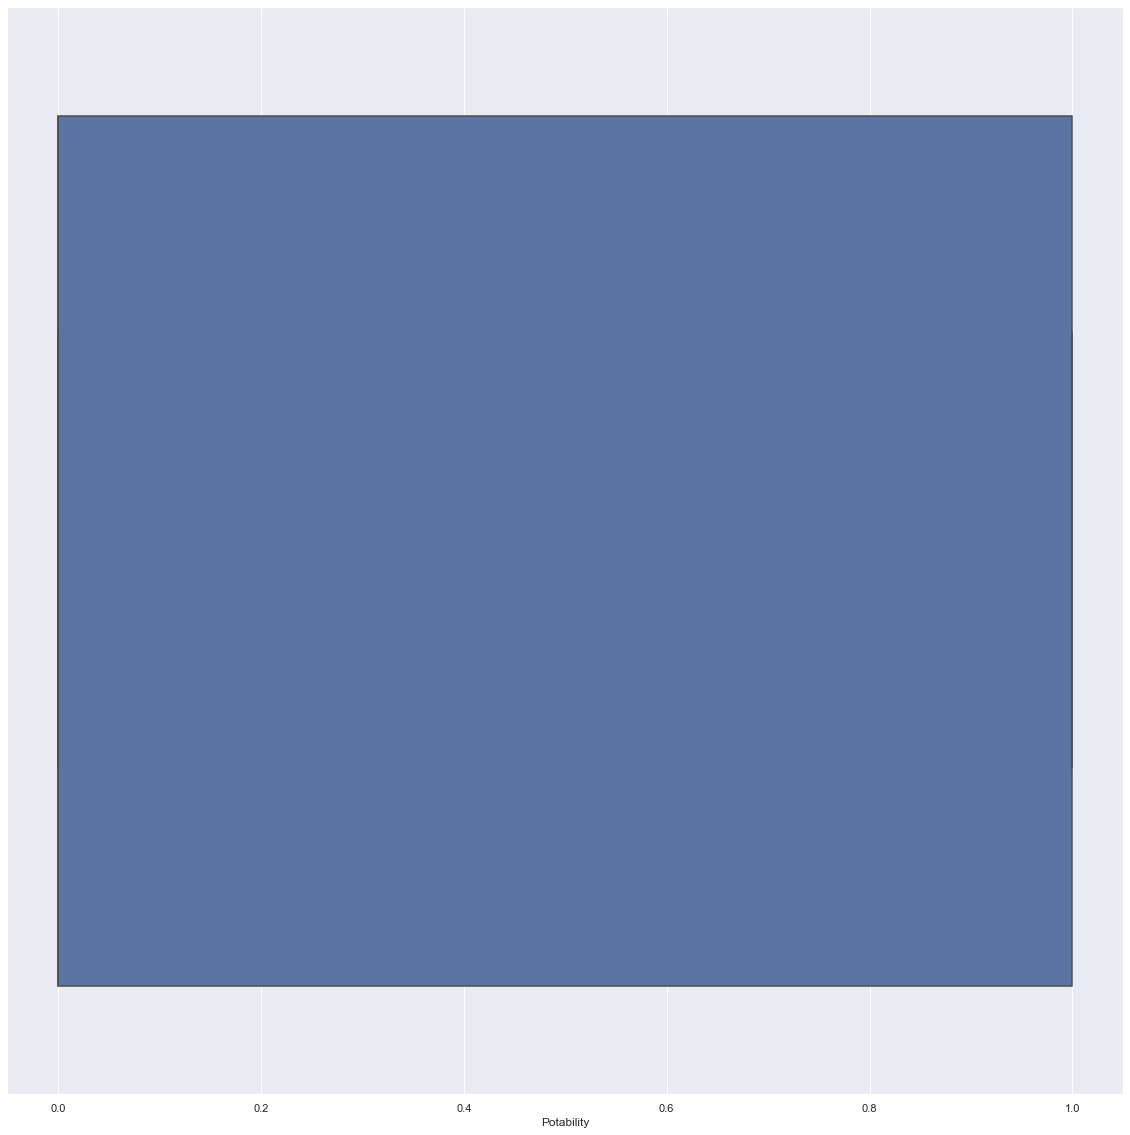

<Figure size 1440x1440 with 0 Axes>

In [20]:
for i in lst:
    sns.boxplot(df[i], orient='vertical')
    plt.figure(figsize=(20,20))


In [21]:
lst=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for i in lst:
 if df[i].dtype in ['int64','float64']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]


In [22]:
df.shape

(2657, 10)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [44]:
model1=[knn,svc,naive,decision,rf,gbc,xgb,ada]
for model in model1:
 model.fit(x_train,y_train)
 y_pred=model.predict(x_test)
 print(model)
 print('Accuracy_Score:',accuracy_score(y_test,y_pred)*100)
 print(classification_report(y_test,y_pred))
 print('------------------------------------------------------------------')

KNeighborsClassifier()
Accuracy_Score: 57.98575788402849
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       585
           1       0.47      0.32      0.38       398

    accuracy                           0.58       983
   macro avg       0.55      0.54      0.53       983
weighted avg       0.56      0.58      0.56       983

------------------------------------------------------------------
SVC()
Accuracy_Score: 59.5116988809766
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 52.28891149542218
              precision    recall  f1-score   support

           

C:\Users\CV MURALI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CV MURALI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CV MURALI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(random_state=1)
Accuracy_Score: 65.20854526958291
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       585
           1       0.64      0.31      0.42       398

    accuracy                           0.65       983
   macro avg       0.65      0.60      0.59       983
weighted avg       0.65      0.65      0.62       983

------------------------------------------------------------------
GradientBoostingClassifier()
Accuracy_Score: 62.970498474059
              precision    recall  f1-score   support

           0       0.63      0.91      0.75       585
           1       0.62      0.22      0.32       398

    accuracy                           0.63       983
   macro avg       0.63      0.56      0.53       983
weighted avg       0.63      0.63      0.57       983

------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              col

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [51]:
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.6449643947100712
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       585
           1       0.71      0.21      0.32       398

    accuracy                           0.64       983
   macro avg       0.67      0.57      0.54       983
weighted avg       0.67      0.64      0.58       983



# Handling imbalanced data using smote

In [27]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [28]:
y_resampled=pd.Series(y_resampled)
y_resampled.value_counts()

0    1998
1    1998
dtype: int64

In [39]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=1)

In [40]:
knns=KNeighborsClassifier()
svcs=SVC()
naives=MultinomialNB()
decisions=DecisionTreeClassifier()
rfs=RandomForestClassifier(random_state=1)
gbs=GradientBoostingClassifier()
xgbs=XGBClassifier()
adas=AdaBoostClassifier()

In [41]:

model3=[knns,svcs,naives,decisions,rfs,gbs,xgbs,adas]
for model in model3:
 model.fit(x_train1,y_train1)
 y_pred=model.predict(x_test1)
 print(model)
 print('Accuracy_Score:',accuracy_score(y_test1,y_pred)*100)
 print(classification_report(y_test1,y_pred))
 print('------------------------------------------------------------------')

KNeighborsClassifier()
Accuracy_Score: 59.75
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       386
           1       0.61      0.62      0.61       414

    accuracy                           0.60       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.60      0.60      0.60       800

------------------------------------------------------------------
SVC()
Accuracy_Score: 49.875
              precision    recall  f1-score   support

           0       0.49      0.76      0.59       386
           1       0.53      0.26      0.35       414

    accuracy                           0.50       800
   macro avg       0.51      0.51      0.47       800
weighted avg       0.51      0.50      0.47       800

------------------------------------------------------------------
MultinomialNB()
Accuracy_Score: 51.0
              precision    recall  f1-score   support

           0       0.49      0.54      0.51   